# Trabajo Práctico 2: Predicción de lluvia

Integrantes:

* Herrera Francisca

* Zahradnicek Ezequiel



# Contexto del problema

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos años, incluyendo si para el día siguiente llovió o no en la columna ‘RainTomorrow’. El objetivo es la predicción de esta variable en función del resto de las características.


In [ ]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler, PowerTransformer

# Análisis descriptivo

Que ayude a la comprensión del problema, de cada una de las variables involucradas, detallando: características, comportamiento y rango de variación. ¿Qué es cada variable?

* Análisis y decisión sobre datos faltantes.
* Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
* ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?
* Codificación de variables categóricas (si se van a utilizar para predicción).
* Matriz de correlación de variables.
* Estandarización/escalado de datos.
* Validación cruzada train - test. Realizar una división del conjunto de datos en conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir validación, que luego será útil) en el MOMENTO donde lo crean adecuado.

## Analisis exploratorio

### Variables y nulos

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Resumen estadístico
# Exploramos rango, media, mediana, desviación estándar
summary = df.describe()
print(summary)

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [ ]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


Contamos con 145460 registros, de tipo float64 y object. Se encuentran valores faltantes.

### Eliminación de nulos de la variable target

In [ ]:
df['RainTomorrow'].isna().sum()

3267

In [ ]:
# Eliminamos los registros donde hay faltantes en la columna target.
df.dropna(subset=['RainTomorrow'], inplace=True)
df['RainTomorrow'].isnull().sum()

0

Se eliminan los nulos de la variable target porque si hay valores faltantes en esta variable, el modelo de clasificación no podrá aprender de esos casos.

### Selección de cuidades de forma aleatoria y dropeo de Location

In [ ]:
# lista_cuidades = df['Location'].unique().tolist()
# cuidades_aleatorias = random.sample(lista_cuidades, 10)

In [ ]:
cuidades_aleatorias = ['Mildura', 'Sale', 'Brisbane', 'Melbourne', 'Sydney', 'Moree', 'NorahHead', 'Portland', 'Ballarat', 'Albany']

Al inicio del trabajo práctico, se seleccionaron 10 ciudades de forma aleatoria. Como no se deseaba que estas ciudades cambiaran cada vez que se ejecutaba el código, se decidio instanciarlas en una lista fija. Sin embargo, también se podría comentar esta lista y permitir que el usuario elija instanciarla de forma aleatoria en cada ejecución, según su preferencia.

In [ ]:
df = df[df['Location'].isin(cuidades_aleatorias)]
df['Location'].unique()

array(['Moree', 'NorahHead', 'Sydney', 'Ballarat', 'Sale', 'Melbourne',
       'Mildura', 'Portland', 'Brisbane', 'Albany'], dtype=object)

In [ ]:
df = df.drop('Location', axis=1)

Decidimos eliminar la variable 'Location', que representa la ciudad de donde se obtienen los datos. Consideramos que la ciudad en sí misma no es el factor determinante.

En lugar de eso, lo que realmente influye en las precipitaciones son las características ambientales de la zona, como la humedad del aire, la presencia de nubes y otras variables climáticas.

Por lo tanto, nuestras variables climáticas existentes son las que realmente capturan la dinámica que determina si va a llover o no. Al eliminar 'Location', evitamos incluir información redundante que no aporta valor adicional al modelo.

## División del dataset

In [ ]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

Consideramos que la clase positiva corresponde a cuando llueve, mientras que la clase negativa se refiere a cuando no llueve. Por lo tanto, se mapea la variable target de esta manera.

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23810, 21), (5953, 21), (23810,), (5953,))

In [ ]:
len(y_train[y==1]), len(y_train[y==0])

(5800, 18010)

Nuestras clases en el conjunto de entrenamiento están desbalanceadas, lo que sugiere que podría ser necesario realizar oversampling o undersampling, o bien utilizar un modelo de regresión que dé más peso a una clase sobre la otra.

Como utilizaremos un modelo de regresión logística que pondere más la clase minoritaria, nuestra métrica deberá tener en cuenta el desbalanceo de clases.

### Histogramas de las variables y boxplots

Al imputar valores faltantes, es importante considerar la distribución de las variables y la cantidad de valores atípicos presentes en ellas. Por lo tanto, se propone realizar histogramas y boxplots de las distribuciones.

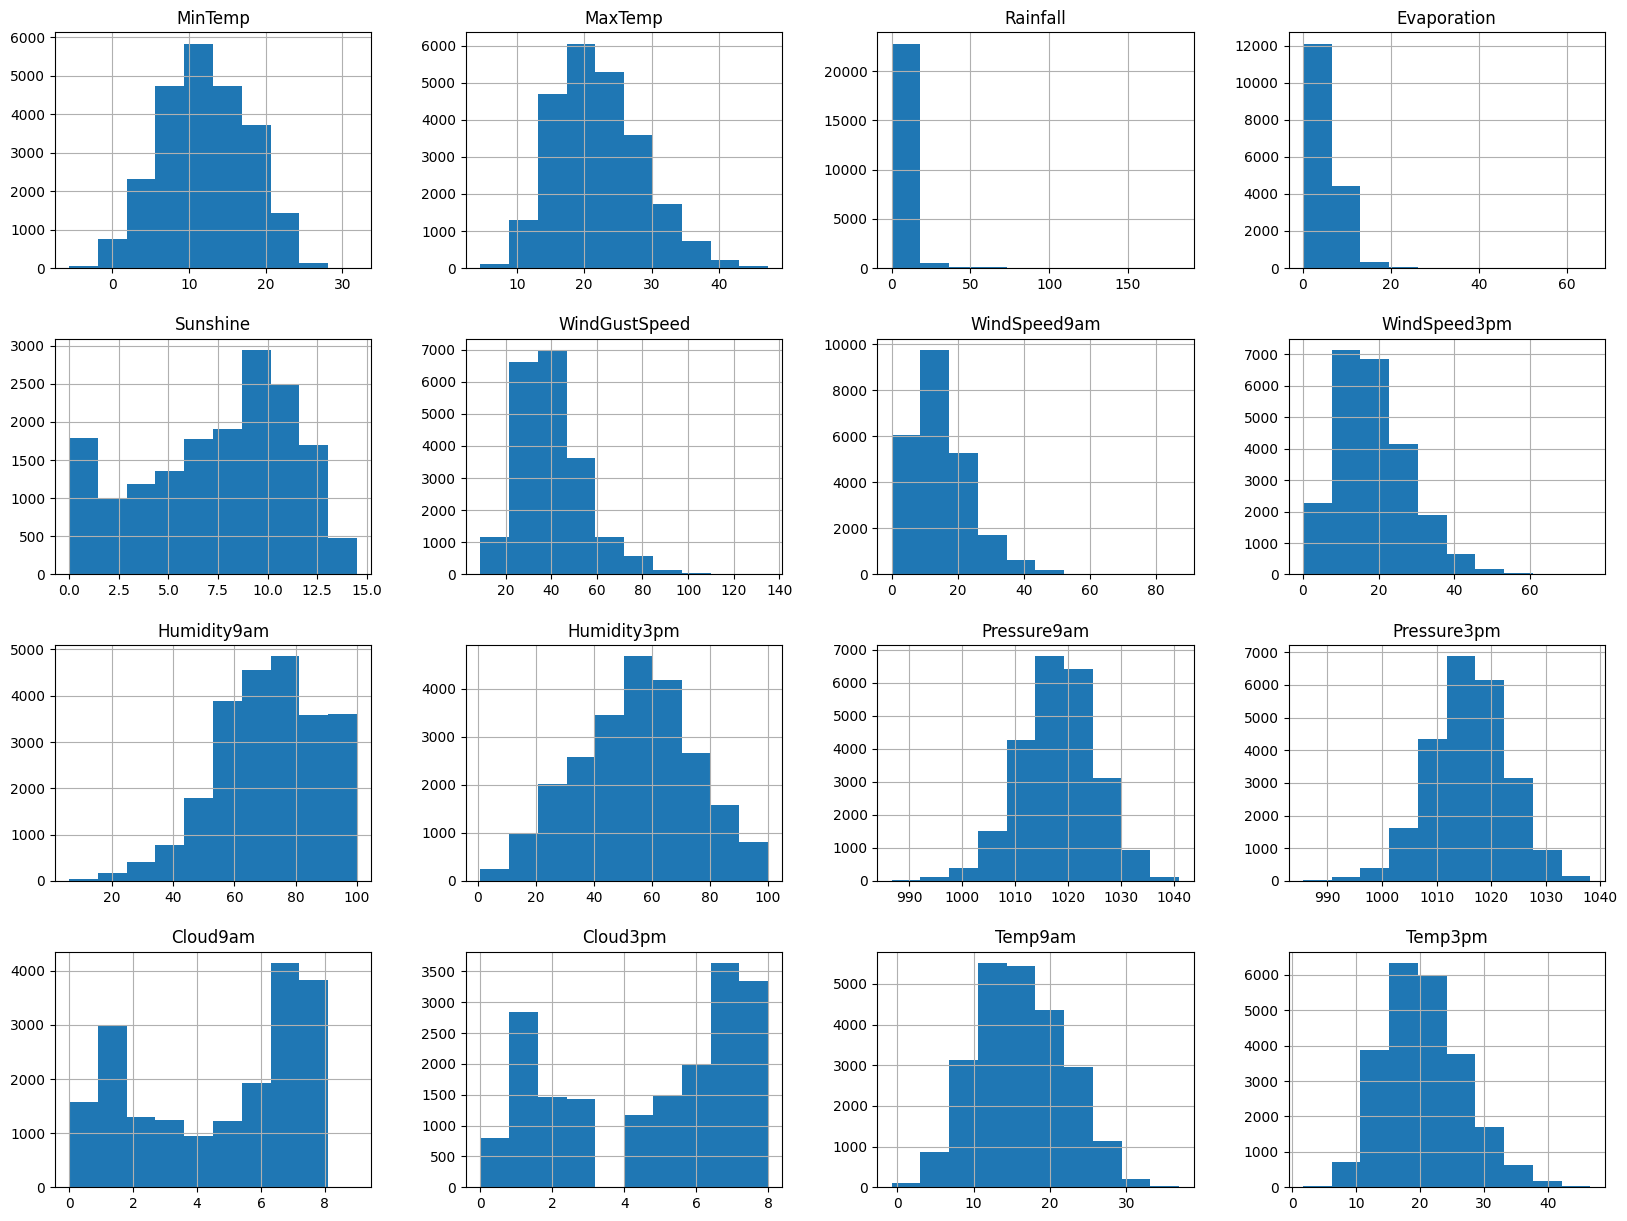

In [ ]:
X_train.hist(figsize=(20, 15))
plt.show()

Se puede observar que muchas de nuestras variables tienen una distribución normal. Sin embargo, algunas presentan una distribución bimodal, mientras que otras siguen una distribución log-normal.

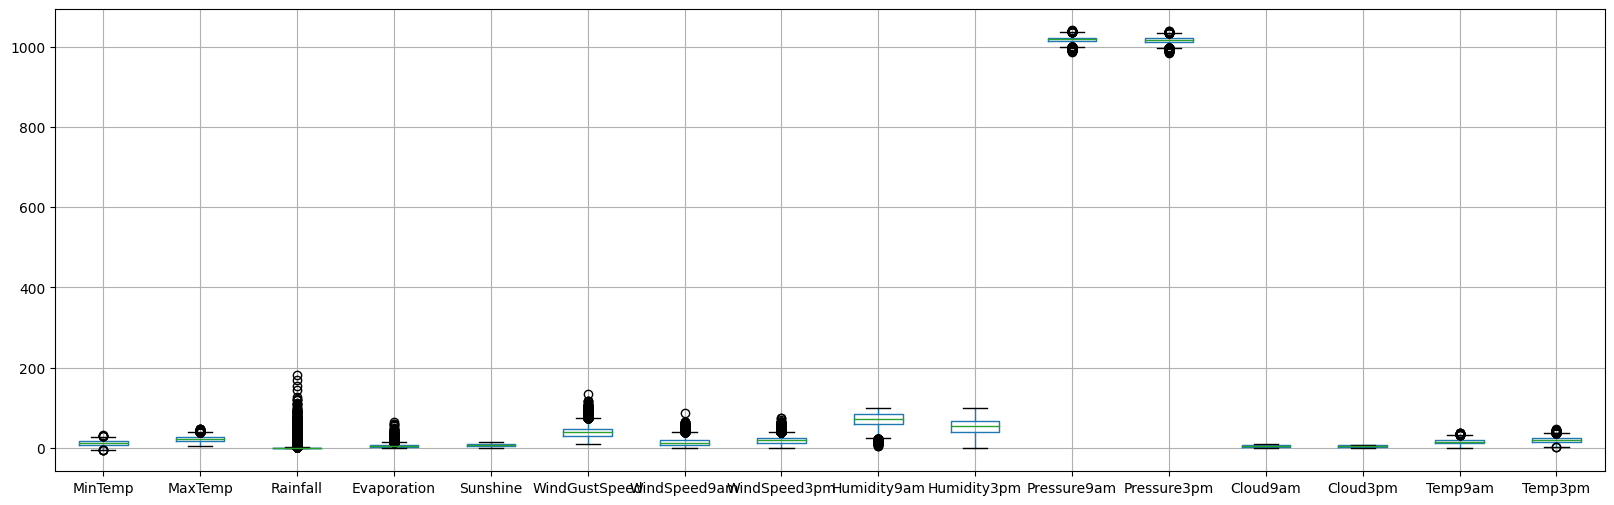

In [ ]:
X_train.boxplot(figsize=(20, 6))
plt.show()

Como se mencionó anteriormente, aunque muchas variables presentan una distribución normal, estas distribuciones están ligeramente sesgadas. Otras variables siguen una distribución log-normal, mientras que algunas muestran una distribución más uniforme.

Se observa una gran cantidad de valores atípicos en las variables con distribuciones log-normales o normales sesgadas, pero no se detectan valores atípicos en variables con distribuciones bimodales ni en aquellas como Sunshine, que tiene una distribución uniforme.

Tampoco se detectan valores atipicos en la variable Humidity3pm dado que tiene una distribucion normal con muy poco sesgo.


La variable con la mayor cantidad de valores atípicos es Rainfall debido problablemente a la diversidad de cuidades y por lo tanto zonas climaticas.

## Codificación de variables categóricas

### Codificación cíclica de la fecha por el día del año


In [ ]:
X_train['Date'].isna().sum(), X_test['Date'].isna().sum()

(0, 0)

In [ ]:
X_train.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
76264  2012-08-07      5.8     15.7       1.6          1.0       7.9   
57889  2016-10-16     10.5     16.2       0.0          NaN       NaN   
62764  2013-07-30      5.0     14.8       0.6          1.6       2.8   
63699  2016-02-20     14.4     21.9       0.0          NaN       NaN   
77054  2014-12-04     14.0     20.3      12.6          1.4       5.4   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
76264         NNW           54.0        NNW        NNW  ...          26.0   
57889           N           59.0        NNE        NNW  ...          28.0   
62764         WSW           33.0          W         SW  ...          20.0   
63699          SE           37.0        WNW        ESE  ...          19.0   
77054         SSW           26.0          E          S  ...          17.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
76264         75.0         53.0       1019.2       1015.2       7.0       7.0   
57889         81.0         84.0       1002.2       1000.8       8.0       8.0   
62764         90.0         51.0       1021.6       1022.0       8.0       6.0   
63699         63.0         49.0       1022.2       1022.5       8.0       8.0   
77054         99.0         83.0       1011.1       1011.2       8.0       8.0   

       Temp9am  Temp3pm  RainToday  
76264      9.2     14.7        Yes  
57889     11.9     13.5         No  
62764     10.0     12.5         No  
63699     16.7     20.7         No  
77054     15.7     18.1        Yes  

[5 rows x 21 columns]

In [ ]:
def enconder_fecha(df, column_date):

  df[column_date] = pd.to_datetime(df[column_date])

  df['day_of_year'] = df[column_date].dt.dayofyear

  df.drop(columns=[column_date], inplace=True)

  df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
  df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

  df.drop(columns=['day_of_year'], inplace=True)

Al codificar la fecha de forma cíclica por el día del año, estoy transformando el día en un formato que refleja su posición en un ciclo continuo.

Esta codificación permite capturar la naturaleza cíclica del tiempo, donde el día 1 y el día 365 están más cercanos entre sí, a pesar de estar separados en una representación lineal. De esta manera, se preservan las relaciones temporales, evitando que el modelo interprete incorrectamente que hay una distancia significativa entre esos días.

In [ ]:
enconder_fecha(X_train, 'Date')
enconder_fecha(X_test, 'Date')

In [ ]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
76264      5.8     15.7       1.6          1.0       7.9         NNW   
57889     10.5     16.2       0.0          NaN       NaN           N   
62764      5.0     14.8       0.6          1.6       2.8         WSW   
63699     14.4     21.9       0.0          NaN       NaN          SE   
77054     14.0     20.3      12.6          1.4       5.4         SSW   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
76264           54.0        NNW        NNW          26.0  ...         53.0   
57889           59.0        NNE        NNW          24.0  ...         84.0   
62764           33.0          W         SW          15.0  ...         51.0   
63699           37.0        WNW        ESE          11.0  ...         49.0   
77054           26.0          E          S           9.0  ...         83.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
76264       1019.2       1015.2       7.0       7.0      9.2     14.7   
57889       1002.2       1000.8       8.0       8.0     11.9     13.5   
62764       1021.6       1022.0       8.0       6.0     10.0     12.5   
63699       1022.2       1022.5       8.0       8.0     16.7     20.7   
77054       1011.1       1011.2       8.0       8.0     15.7     18.1   

       RainToday  day_of_year_sin day_of_year_cos  
76264        Yes        -0.601624       -0.798779  
57889         No        -0.961130        0.276097  
62764         No        -0.471160       -0.882048  
63699         No         0.769415        0.638749  
77054        Yes        -0.448229        0.893919  

[5 rows x 22 columns]

### Codificación de direcciones cardinales como senos y cosenos

In [ ]:
def enconder_direcciones(df, column_name):

  order = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

  # Inicializar el encoder
  encoder = OrdinalEncoder(categories=[order], handle_unknown='use_encoded_value', unknown_value=np.nan)

  # Codificar las direcciones
  angles = encoder.fit_transform(df[column_name].values.reshape(-1, 1))

  # Convertir a ángulos
  df[column_name] = angles * 22.5

  df[column_name + '_sin'] = np.sin(np.deg2rad(df[column_name]))
  df[column_name + '_cos'] = np.cos(np.deg2rad(df[column_name]))

  df.drop(columns=[column_name], inplace=True)

Actualmente, estamos codificando direcciones cardinales como ángulos, donde cada dirección se representa en un formato ordinal que sigue el sentido de las agujas del reloj.

Posteriormente, convertimos estos ángulos en una codificación cíclica. Como ya explicamos esta transformación es esencial para capturar la naturaleza cíclica de las direcciones.

In [ ]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
76264      5.8     15.7       1.6          1.0       7.9         NNW   
57889     10.5     16.2       0.0          NaN       NaN           N   
62764      5.0     14.8       0.6          1.6       2.8         WSW   
63699     14.4     21.9       0.0          NaN       NaN          SE   
77054     14.0     20.3      12.6          1.4       5.4         SSW   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
76264           54.0        NNW        NNW          26.0  ...         53.0   
57889           59.0        NNE        NNW          24.0  ...         84.0   
62764           33.0          W         SW          15.0  ...         51.0   
63699           37.0        WNW        ESE          11.0  ...         49.0   
77054           26.0          E          S           9.0  ...         83.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
76264       1019.2       1015.2       7.0       7.0      9.2     14.7   
57889       1002.2       1000.8       8.0       8.0     11.9     13.5   
62764       1021.6       1022.0       8.0       6.0     10.0     12.5   
63699       1022.2       1022.5       8.0       8.0     16.7     20.7   
77054       1011.1       1011.2       8.0       8.0     15.7     18.1   

       RainToday  day_of_year_sin day_of_year_cos  
76264        Yes        -0.601624       -0.798779  
57889         No        -0.961130        0.276097  
62764         No        -0.471160       -0.882048  
63699         No         0.769415        0.638749  
77054        Yes        -0.448229        0.893919  

[5 rows x 22 columns]

In [ ]:
enconder_direcciones(X_train, 'WindGustDir')
enconder_direcciones(X_train, 'WindDir9am')
enconder_direcciones(X_train, 'WindDir3pm')

enconder_direcciones(X_test, 'WindGustDir')
enconder_direcciones(X_test, 'WindDir9am')
enconder_direcciones(X_test, 'WindDir3pm')

In [ ]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
76264      5.8     15.7       1.6          1.0       7.9           54.0   
57889     10.5     16.2       0.0          NaN       NaN           59.0   
62764      5.0     14.8       0.6          1.6       2.8           33.0   
63699     14.4     21.9       0.0          NaN       NaN           37.0   
77054     14.0     20.3      12.6          1.4       5.4           26.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Temp3pm  \
76264          26.0          26.0         75.0         53.0  ...     14.7   
57889          24.0          28.0         81.0         84.0  ...     13.5   
62764          15.0          20.0         90.0         51.0  ...     12.5   
63699          11.0          19.0         63.0         49.0  ...     20.7   
77054           9.0          17.0         99.0         83.0  ...     18.1   

       RainToday  day_of_year_sin  day_of_year_cos  WindGustDir_sin  \
76264        Yes        -0.601624        -0.798779        -0.382683   
57889         No        -0.961130         0.276097         0.000000   
62764         No        -0.471160        -0.882048        -0.923880   
63699         No         0.769415         0.638749         0.707107   
77054        Yes        -0.448229         0.893919        -0.382683   

       WindGustDir_cos WindDir9am_sin  WindDir9am_cos  WindDir3pm_sin  \
76264         0.923880      -0.382683    9.238795e-01   -3.826834e-01   
57889         1.000000       0.382683    9.238795e-01   -3.826834e-01   
62764        -0.382683      -1.000000   -1.836970e-16   -7.071068e-01   
63699        -0.707107      -0.923880    3.826834e-01    9.238795e-01   
77054        -0.923880       1.000000    6.123234e-17    1.224647e-16   

       WindDir3pm_cos  
76264        0.923880  
57889        0.923880  
62764       -0.707107  
63699       -0.382683  
77054       -1.000000  

[5 rows x 25 columns]

### Codificación de RainToday a variable binaria

In [ ]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
76264      5.8     15.7       1.6          1.0       7.9           54.0   
57889     10.5     16.2       0.0          NaN       NaN           59.0   
62764      5.0     14.8       0.6          1.6       2.8           33.0   
63699     14.4     21.9       0.0          NaN       NaN           37.0   
77054     14.0     20.3      12.6          1.4       5.4           26.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Temp3pm  \
76264          26.0          26.0         75.0         53.0  ...     14.7   
57889          24.0          28.0         81.0         84.0  ...     13.5   
62764          15.0          20.0         90.0         51.0  ...     12.5   
63699          11.0          19.0         63.0         49.0  ...     20.7   
77054           9.0          17.0         99.0         83.0  ...     18.1   

       RainToday  day_of_year_sin  day_of_year_cos  WindGustDir_sin  \
76264        Yes        -0.601624        -0.798779        -0.382683   
57889         No        -0.961130         0.276097         0.000000   
62764         No        -0.471160        -0.882048        -0.923880   
63699         No         0.769415         0.638749         0.707107   
77054        Yes        -0.448229         0.893919        -0.382683   

       WindGustDir_cos WindDir9am_sin  WindDir9am_cos  WindDir3pm_sin  \
76264         0.923880      -0.382683    9.238795e-01   -3.826834e-01   
57889         1.000000       0.382683    9.238795e-01   -3.826834e-01   
62764        -0.382683      -1.000000   -1.836970e-16   -7.071068e-01   
63699        -0.707107      -0.923880    3.826834e-01    9.238795e-01   
77054        -0.923880       1.000000    6.123234e-17    1.224647e-16   

       WindDir3pm_cos  
76264        0.923880  
57889        0.923880  
62764       -0.707107  
63699       -0.382683  
77054       -1.000000  

[5 rows x 25 columns]

In [ ]:
X_train['RainToday'] = X_train['RainToday'].map({'Yes': 1, 'No': 0})
X_test['RainToday'] = X_test['RainToday'].map({'Yes': 1, 'No': 0})

In [ ]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
76264      5.8     15.7       1.6          1.0       7.9           54.0   
57889     10.5     16.2       0.0          NaN       NaN           59.0   
62764      5.0     14.8       0.6          1.6       2.8           33.0   
63699     14.4     21.9       0.0          NaN       NaN           37.0   
77054     14.0     20.3      12.6          1.4       5.4           26.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Temp3pm  \
76264          26.0          26.0         75.0         53.0  ...     14.7   
57889          24.0          28.0         81.0         84.0  ...     13.5   
62764          15.0          20.0         90.0         51.0  ...     12.5   
63699          11.0          19.0         63.0         49.0  ...     20.7   
77054           9.0          17.0         99.0         83.0  ...     18.1   

       RainToday  day_of_year_sin  day_of_year_cos  WindGustDir_sin  \
76264        1.0        -0.601624        -0.798779        -0.382683   
57889        0.0        -0.961130         0.276097         0.000000   
62764        0.0        -0.471160        -0.882048        -0.923880   
63699        0.0         0.769415         0.638749         0.707107   
77054        1.0        -0.448229         0.893919        -0.382683   

       WindGustDir_cos  WindDir9am_sin  WindDir9am_cos  WindDir3pm_sin  \
76264         0.923880       -0.382683    9.238795e-01   -3.826834e-01   
57889         1.000000        0.382683    9.238795e-01   -3.826834e-01   
62764        -0.382683       -1.000000   -1.836970e-16   -7.071068e-01   
63699        -0.707107       -0.923880    3.826834e-01    9.238795e-01   
77054        -0.923880        1.000000    6.123234e-17    1.224647e-16   

       WindDir3pm_cos  
76264        0.923880  
57889        0.923880  
62764       -0.707107  
63699       -0.382683  
77054       -1.000000  

[5 rows x 25 columns]

## Imputación de datos faltantes

Si bien algunas variables presentan una distribución normal y, por lo tanto, se podría considerar la imputación de datos utilizando la mediana, esta opción no es aplicable en todas las distribuciones.

Por esta razón se eligió el método de imputación KNN. Así, se mejora la precisión de la imputación para todas las distribuciones sin mucho costo computacional agregado.

In [ ]:
columns = X_train.columns

In [ ]:
# Creamos el imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

X_train = knn_imputer.fit_transform(X_train)
X_test = knn_imputer.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [ ]:
X_train.shape, X_test.shape

((23810, 25), (5953, 25))

## Distribuciones según la target

In [ ]:
def boxplots(X, y):
    # Concatenar target y características
    data = pd.concat([X, y], axis=1)

    # Número de características
    num_features = X.shape[1]

    # Calcular el número de filas (máximo 5 gráficos por fila)
    num_cols = 5
    num_rows = (num_features + num_cols - 1) // num_cols  # Redondeo hacia arriba

    # Crear la figura y los ejes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Si solo hay una fila, asegurar que 'axes' sea una lista
    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    # Aplanar los ejes para facilitar la indexación
    axes = axes.flatten()

    # Recorrer cada feature para generar su diagrama de caja respecto de la salida
    for i, feature in enumerate(data.columns[1:]):
        sns.boxplot(x='RainTomorrow', y=feature, data=data, ax=axes[i])
        axes[i].set_title(f'Diagrama de caja de {feature}')
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(feature)

    # Eliminar subplots vacíos si es necesario
    if num_features < len(axes):
        for i in range(num_features, len(axes)):
            fig.delaxes(axes[i])

    plt.show()


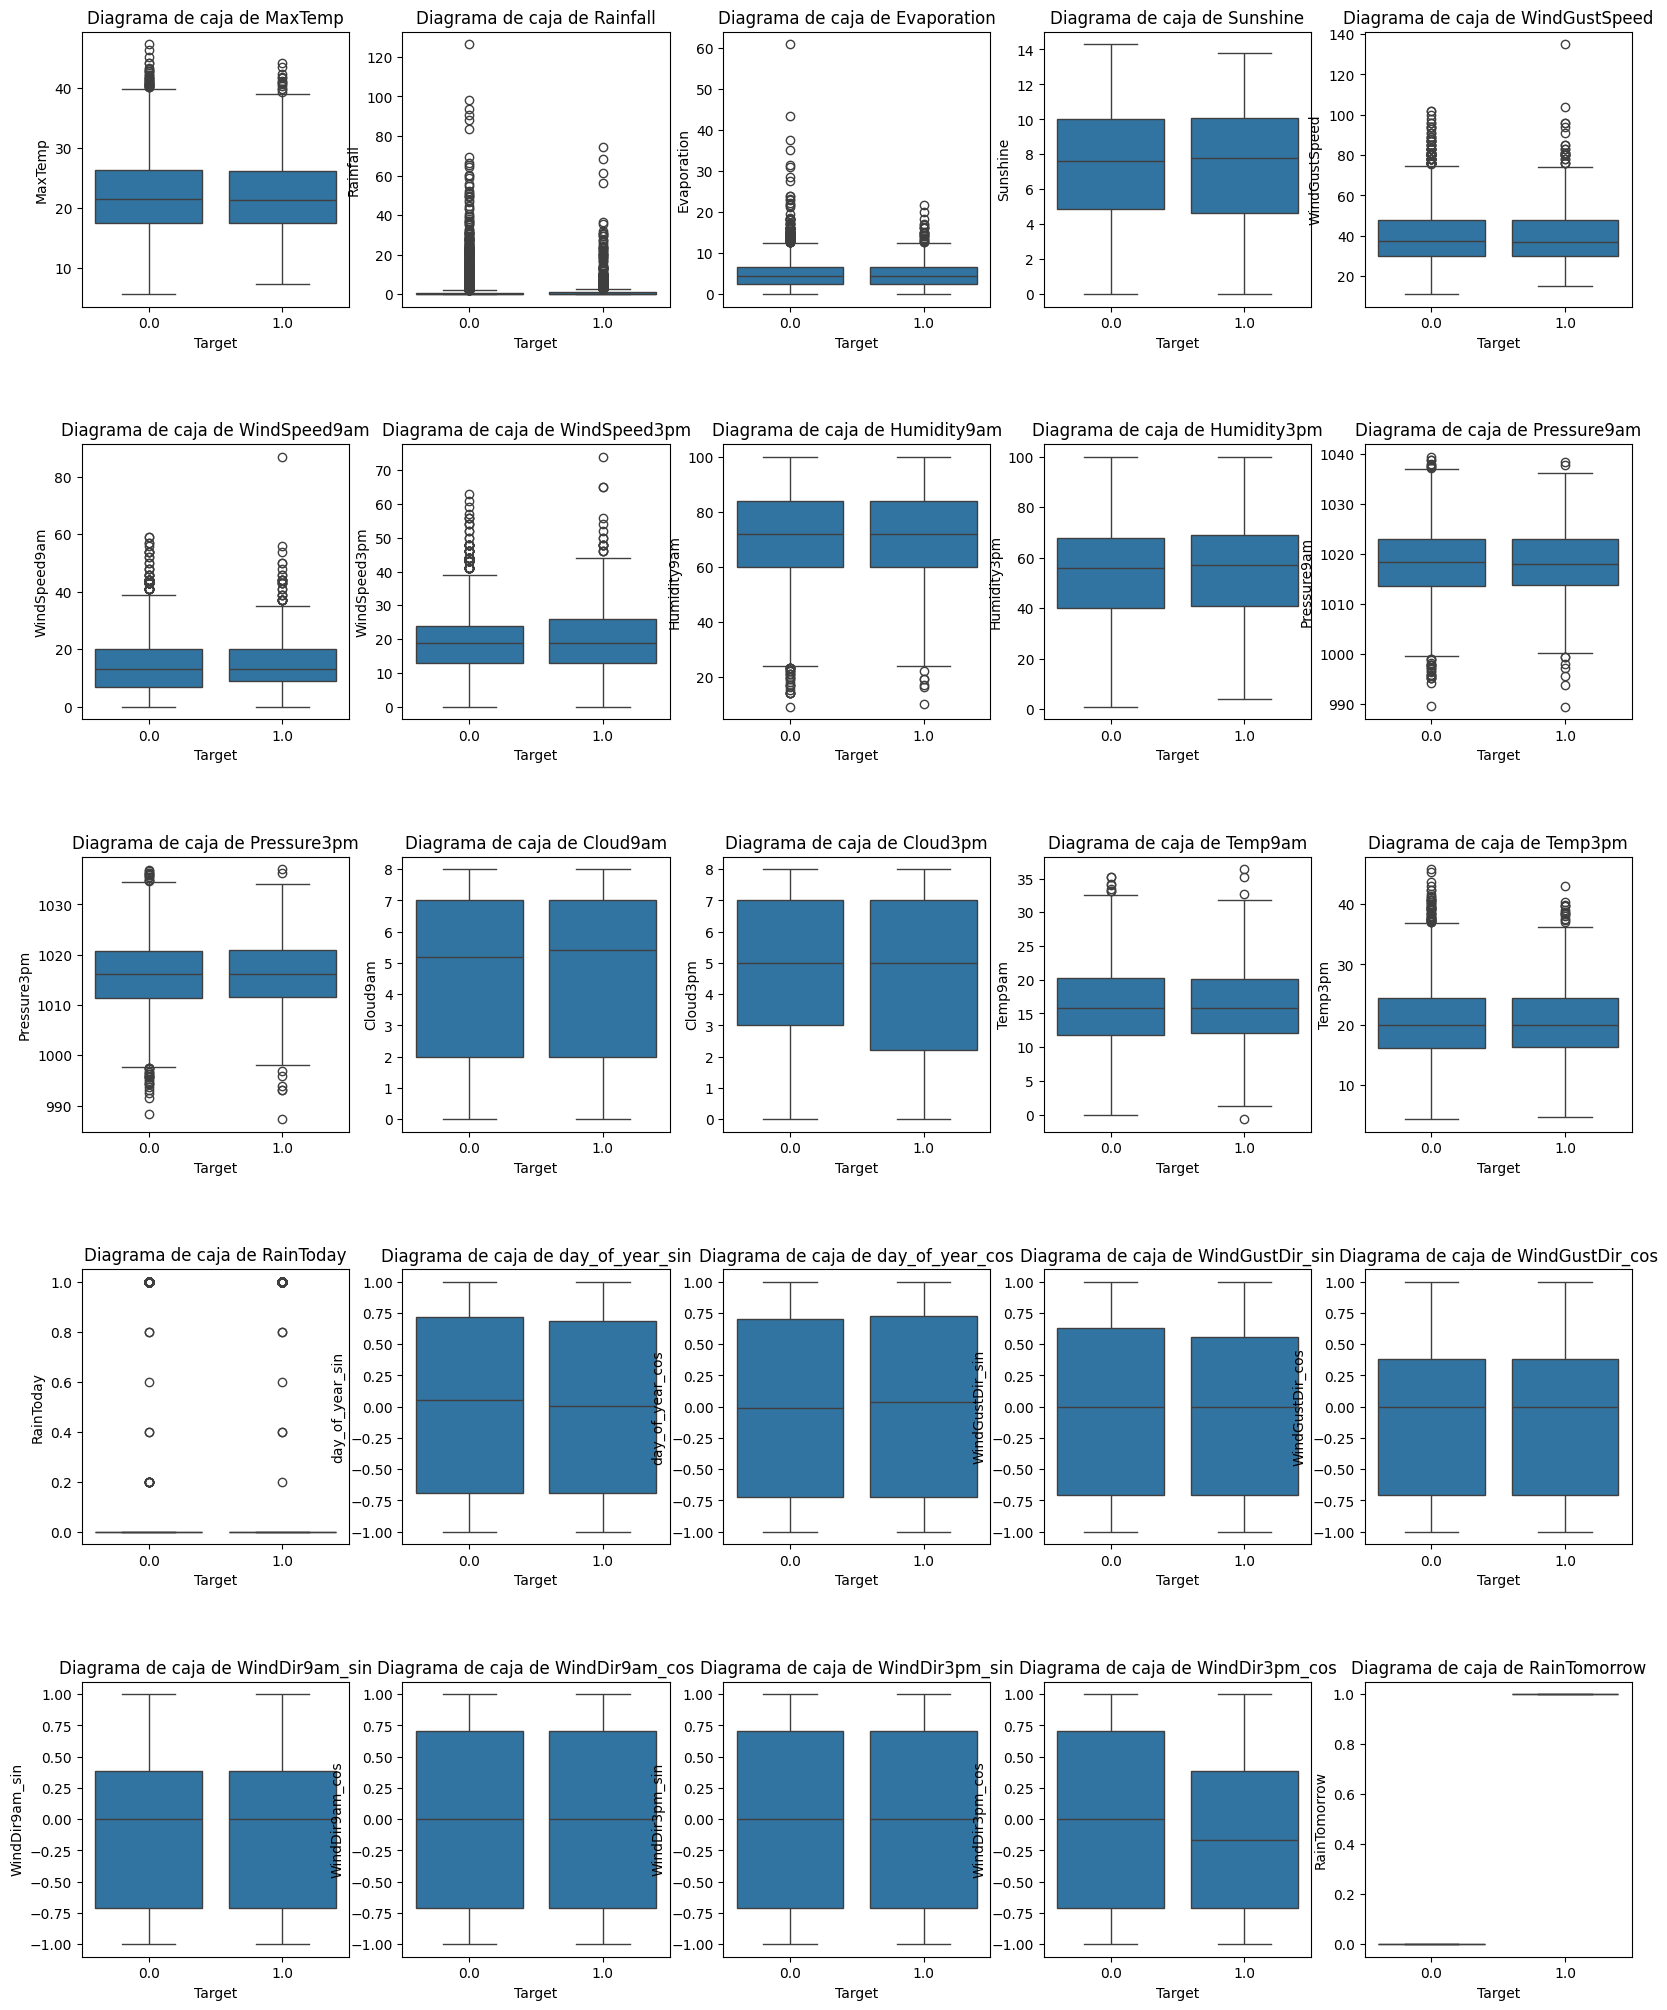

In [ ]:
boxplots(X_train, y_train)

Al observar estos boxplots, notamos que la mayoría de las distribuciones son prácticamente iguales, independientemente de si pertenecen a la clase positiva o negativa.

Esto sugiere que, a primera vista, no hay ninguna variable que destaque como un predictor claro de la clase a la que pertenece cada observación.

In [ ]:
def pairplot(X, y):

  # Descartamos las features binarias
  features = []
  for i in X.columns:
    if len(X[i].unique()) > 10:
      features.append(i)

  # Número de características
  num_features = len(features)

  # Calcular el número de filas (máximo 1 gráficos por fila)
  num_cols = 1
  num_rows = (num_features + num_cols - 1) // num_cols

  # Crear la figura y los ejes
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

  # Aplanar los ejes para facilitar la indexación
  axes = axes.flatten()

  # Recorrer cada feature para generar su diagrama de caja respecto de la salida
  for i, feature in enumerate(features):
    if i < len(axes):
      sns.scatterplot(x=X[feature], y=y, ax=axes[i], hue=y, palette='Set1')
      axes[i].set_title(f'{feature} vs target')
    else:
      break

  # Eliminar subplots vacíos si es necesario
  if num_features < len(axes):
    for i in range(num_features, len(axes)):
      fig.delaxes(axes[i])

  plt.tight_layout()
  plt.show()

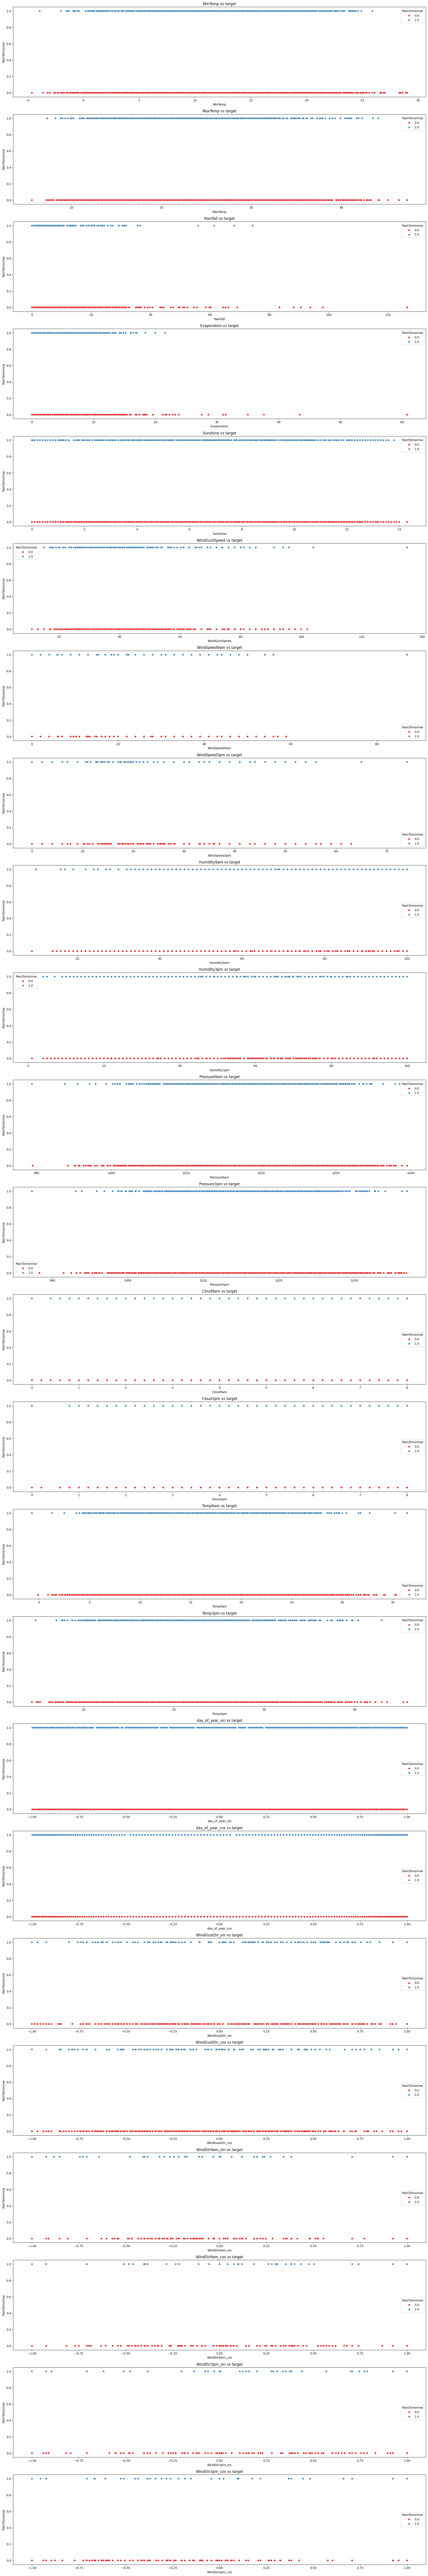

In [ ]:
pairplot(X_train, y_train)

De igual forma observamos que las distribuciones son prácticamente idénticas. Esto es consistente con lo que se observó anteriormente en los boxplots, donde todas las variables mostraban una distribución similar.

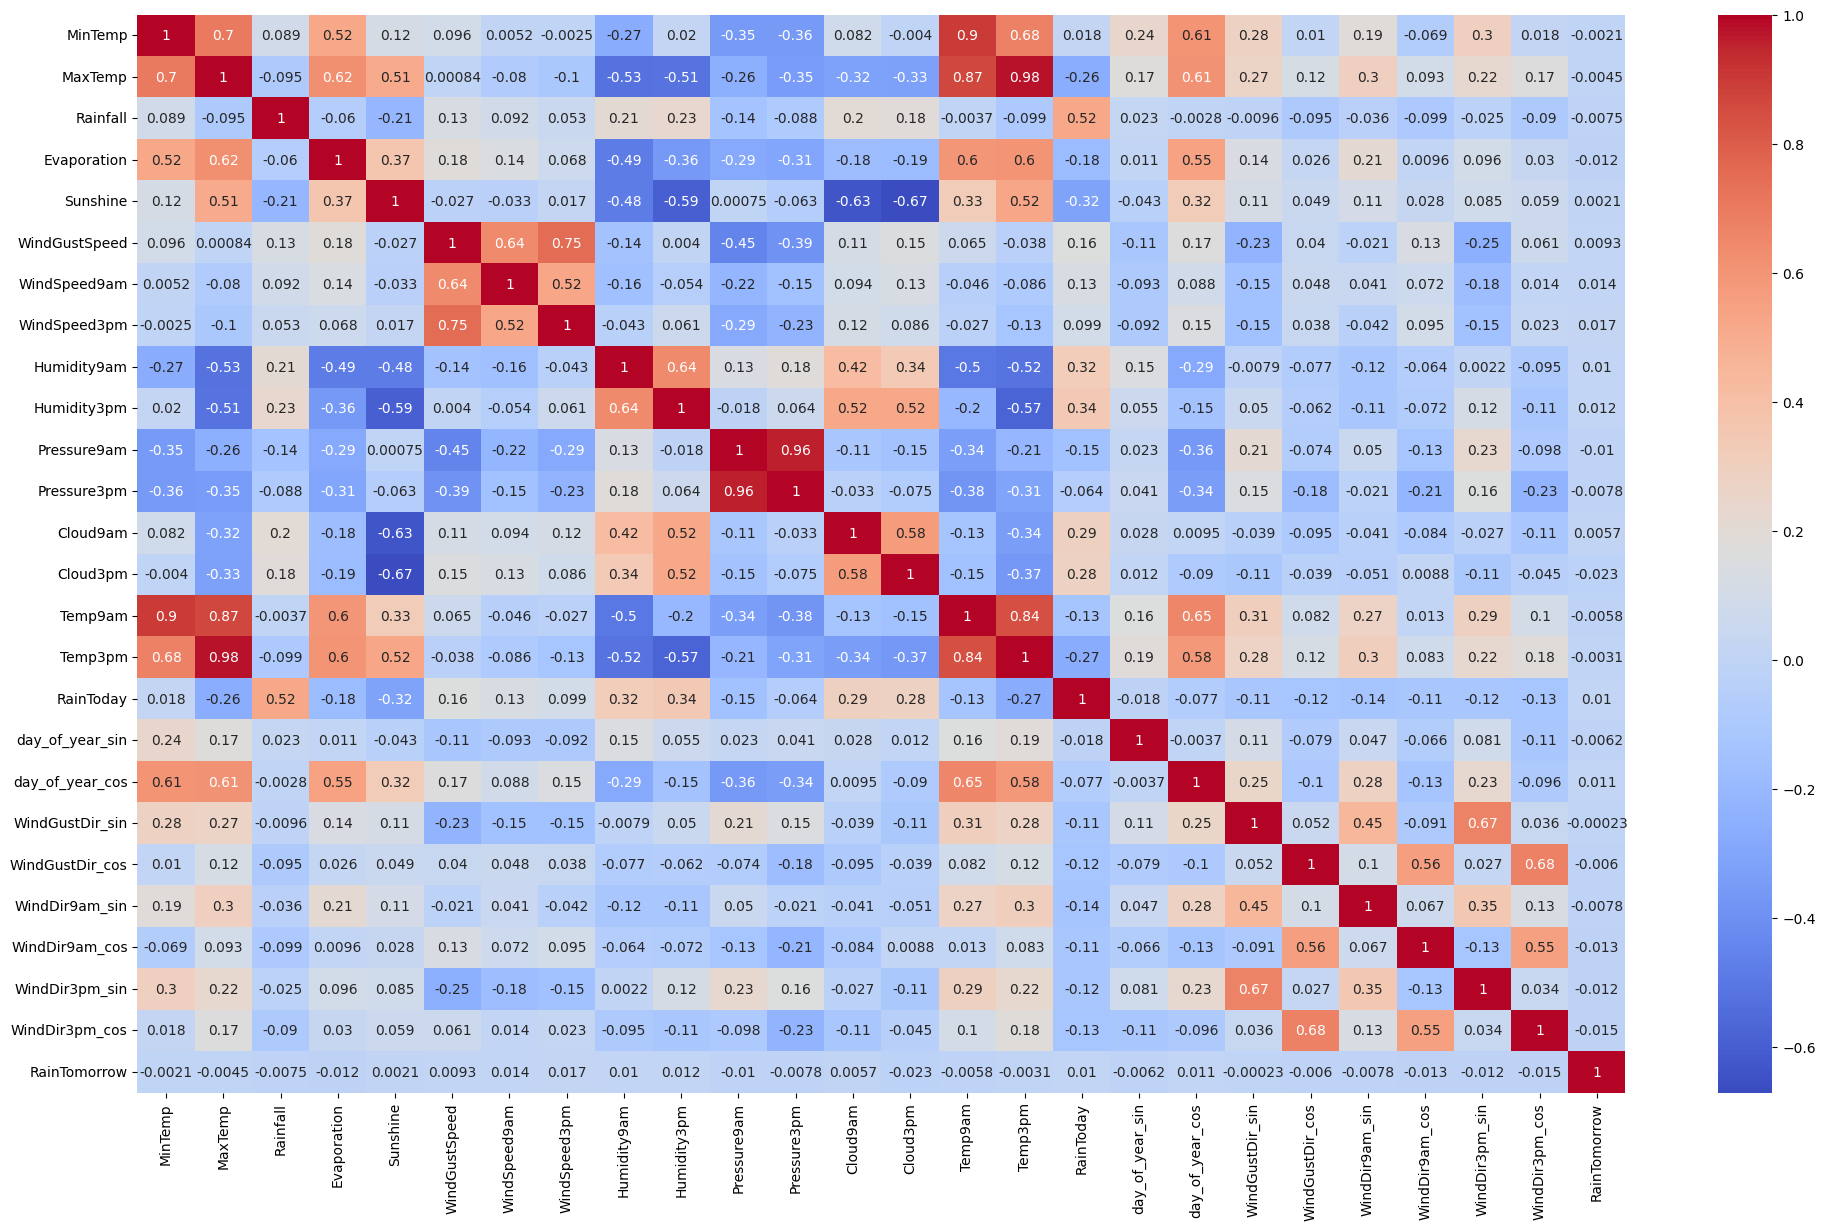

In [ ]:
corr = pd.concat([X_train, y_train], axis=1).corr()

plt.figure(figsize=(24, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

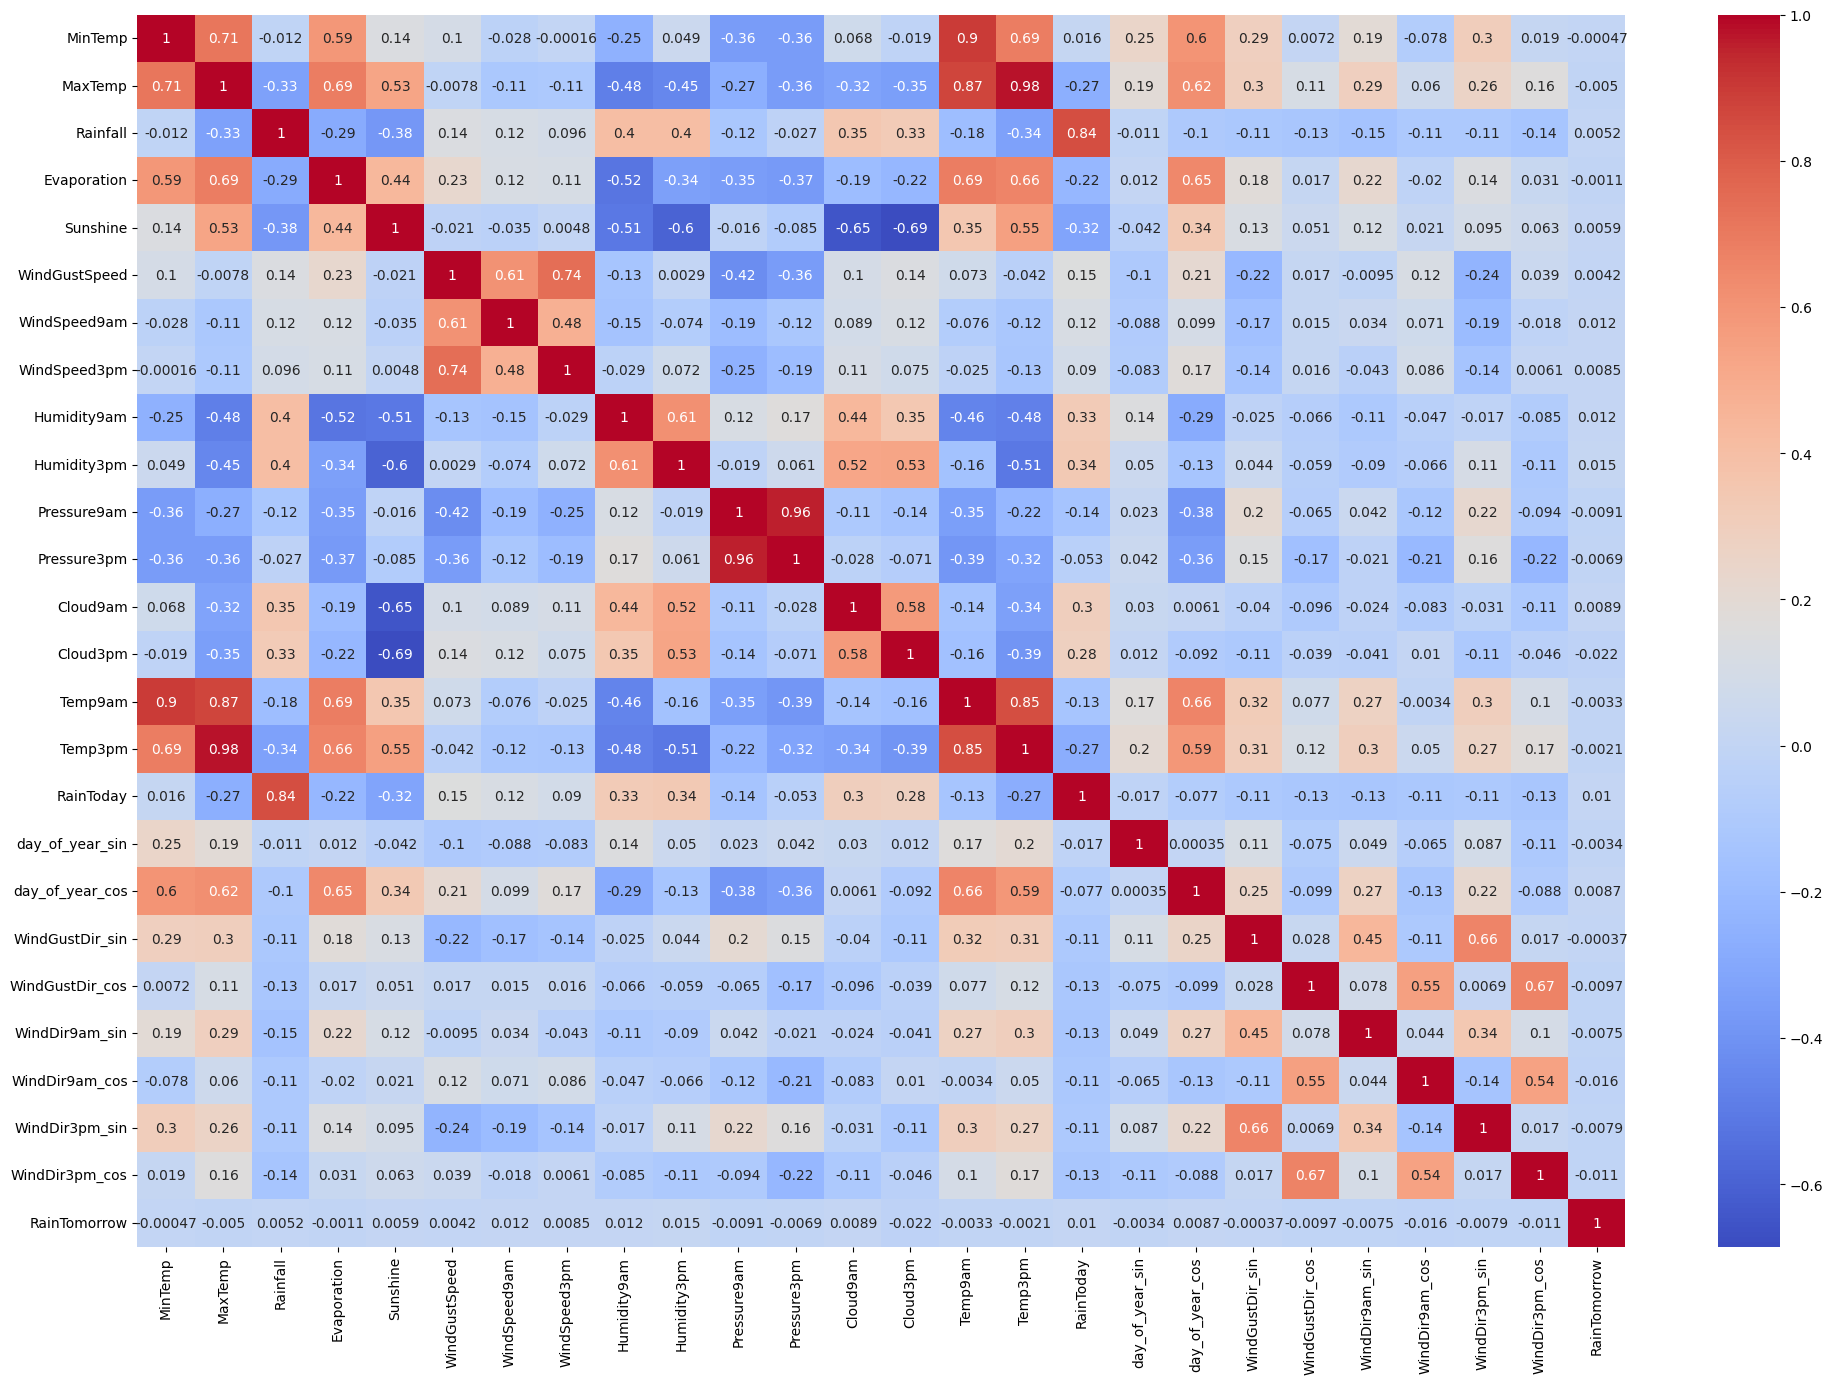

In [ ]:
corr = pd.concat([X_train, y_train], axis=1).corr(method='spearman')

plt.figure(figsize=(24, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

De igual manera con lo mencionado anteriormente, al examinar la matriz de correlación, se puede observar que la target no presenta correlaciones lineales ni de monotonía significativas con ninguna de las variables.

Esta falta de correlación sugiere que las relaciones entre la target y las demás variables son débiles, lo que implica que no hay patrones claros que puedan utilizarse para predecir la clase de la variable objetivo a partir de las características disponibles.

## Estandarización/escalado de datos.

In [ ]:
columns = X_train.columns

In [ ]:
columnas_binarias = [col for col in X_train.columns if X_train[col].nunique() == 2 and sorted(X_train[col].unique()) == [0, 1]]
columnas_trigonometricas = [col for col in X_train.columns if 'sin' in col or 'cos' in col]

colmunas_imputables = X_train.columns.difference(columnas_binarias).difference(columnas_trigonometricas)

power_transformer = PowerTransformer(method='yeo-johnson')
scaler = StandardScaler()

X_train[colmunas_imputables] = power_transformer.fit_transform(X_train[colmunas_imputables])
X_train[colmunas_imputables] = scaler.fit_transform(X_train[colmunas_imputables])

X_test[colmunas_imputables] = power_transformer.transform(X_test[colmunas_imputables])
X_test[colmunas_imputables] = scaler.transform(X_test[colmunas_imputables])

Es importante tener en cuenta que escalar las variables binarias y trigonométricas no solo no aporta valor al análisis, sino que puede complicar la interpretación de la información.

Por lo que excluimos estas columnas a la hora de transofrmar y escalar los datos, quedándonos únicamente con las columnas que no son ni binarias ni trigonométricas.

In [ ]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

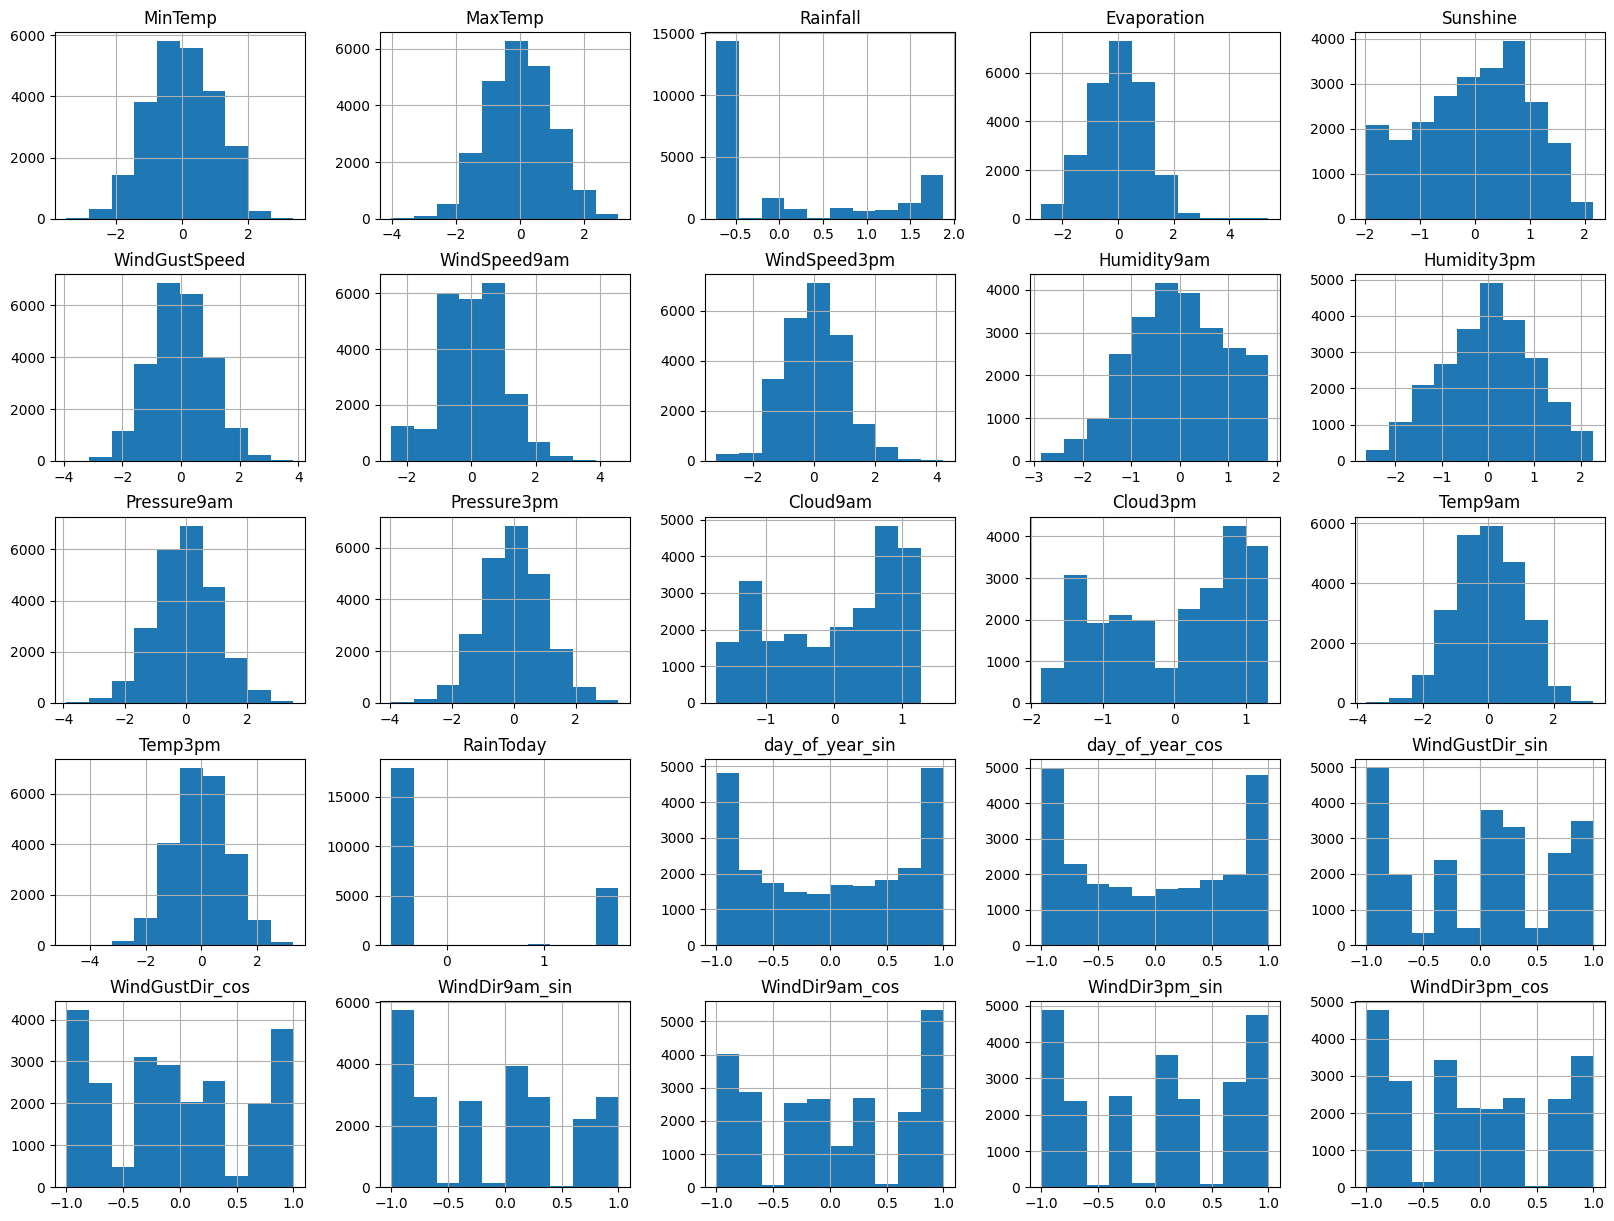

In [ ]:
X_train.hist(figsize=(20, 15))
plt.show()

# Solución del problema de clasificación con regresión logística
* Obtener las métricas adecuadas (accuracy, precision, recall, F1 score, entre otras, ¡investiguen adicionales!). Graficar matrices de confusión para cada modelo. Analizar “falsos negativos” y “falsos positivos”, ¿qué significa cada uno?

* Trazar curvas ROC para cada modelo. Comenten cuáles serían los umbrales adecuados a utilizar; ¿cómo podrían calcular el mejor umbral? ¿Es 0.5 el mejor?

* ¿Creen que han conseguido un buen fitting?


* Verdaderos Positivos (TP): Casos en los que el modelo predijo correctamente que llovía.
* Falsos Negativos (FN): Casos en los que el modelo predijo que no llovía, pero en realidad sí llovió. El modelo no detectó la lluvia.
* Falsos Positivos (FP): Casos en los que el modelo predijo que llovía, pero en realidad no llovió.
* Verdaderos Negativos (TN): Casos en los que el modelo predijo correctamente que no llovía.

Dado que en nuestro análisis no hay una clase que sea más relevante que la otra es decir, que tanto predecir que llueve como predecir que no llueve tiene implicaciones similares.

Muestra prioridad es optimizar el rendimiento del modelo para que maximice los verdaderos positivos (TP), es decir, queremos asegurarnos de que, en la mayor medida posible, detectemos correctamente los casos en que llueve.

Por lo que queremos minimizar los FP y FN por lo que elegimos F1 Score.

El F1 Score se utiliza cuando los Falsos Negativos (False Negatives) y los Falsos Positivos (False Positives) son importantes. Y es una muy buena métrica para datos desbalanceados.

In [ ]:
logreg = LogisticRegression(class_weight='balanced')

In [ ]:
# Entrenamos un modelo de regresion logistica.
logreg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)

In [ ]:
f1_score_logreg = f1_score(y_test, y_pred)

confusion_matrix_logreg = confusion_matrix(y_test, y_pred)

classification_report_logreg = classification_report(y_test, y_pred)

print(f'f1 Score: {f1_score_logreg} \n')
print(f'Confusion Matrix:\n{confusion_matrix_logreg} \n')
print(f'Classification Report:\n{classification_report_logreg} \n')

f1 Score: 0.6220403390821397 

Confusion Matrix:
[[3596  997]
 [ 296 1064]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      4593
           1       0.52      0.78      0.62      1360

    accuracy                           0.78      5953
   macro avg       0.72      0.78      0.73      5953
weighted avg       0.83      0.78      0.80      5953
 



In [ ]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logreg.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

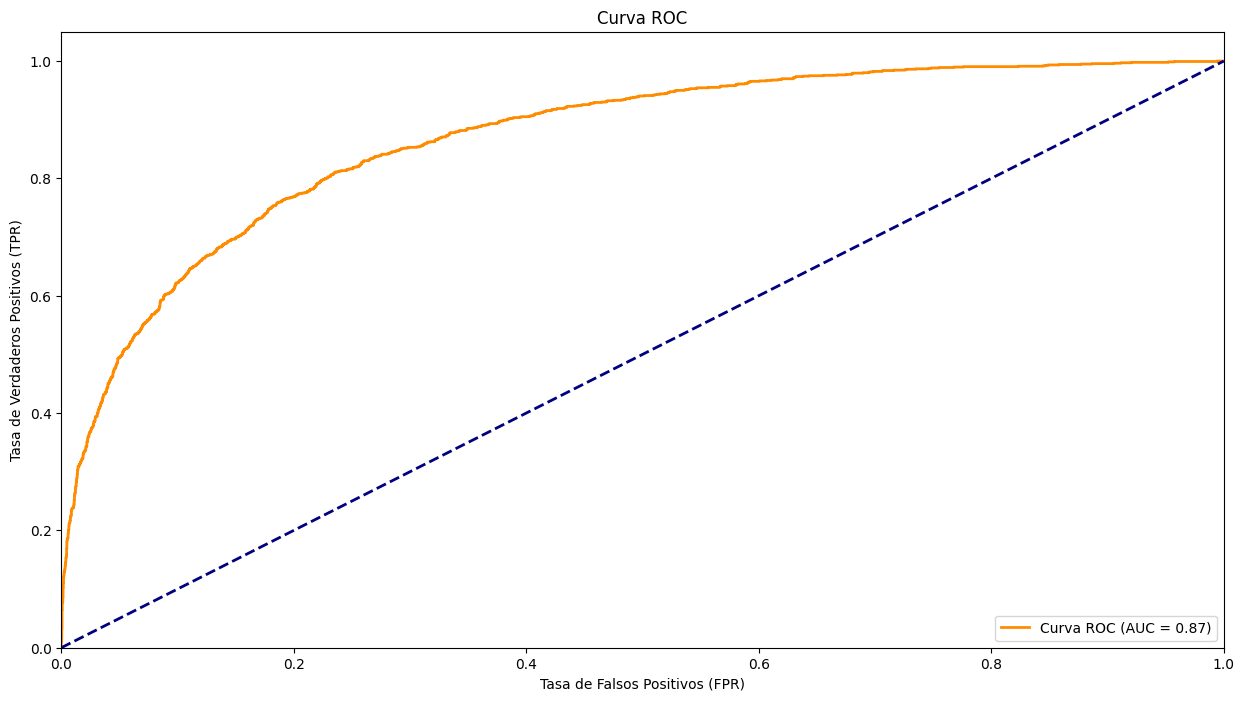

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Se calcula el umbral optimo usando el punto mas cercano al (0,1)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]
best_threshold

0.47289645602436

In [ ]:
optimal_threshold = best_threshold

# Aplica el umbral óptimo para hacer predicciones
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

f1_score_logreg = f1_score(y_test, y_pred_optimal)

confusion_matrix_logreg = confusion_matrix(y_test, y_pred_optimal)

classification_report_logreg = classification_report(y_test, y_pred_optimal)

print(f'f1 Score: {f1_score_logreg} \n')
print(f'Confusion Matrix:\n{confusion_matrix_logreg} \n')
print(f'Classification Report:\n{classification_report_logreg} \n')

f1 Score: 0.6223855285472019 

Confusion Matrix:
[[3516 1077]
 [ 259 1101]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      4593
           1       0.51      0.81      0.62      1360

    accuracy                           0.78      5953
   macro avg       0.72      0.79      0.73      5953
weighted avg       0.83      0.78      0.79      5953
 



Después de ajustar el umbral óptimo, se observó que el F1-score aumentó ligeramente, lo que indica una pequeña mejora en la capacidad del modelo para predecir la lluvia, esto se refleja en que los TP aumentaron un poco.

Sin embargo, también se notó un aumento en los FP, lo que significa que el modelo está clasificando erróneamente más casos como lluvia cuando en realidad no lo son. Por otro lado, los FN disminuyeron ligeramente.

# Modelo base

In [ ]:
# Elegimos KNN como modelo base
basemodel = KNeighborsClassifier(n_neighbors=7)
basemodel.fit(X_train, y_train)

# Hacer predicciones
y_pred = basemodel.predict(X_test)

In [ ]:
f1_score_logreg = f1_score(y_test, y_pred)

confusion_matrix_logreg = confusion_matrix(y_test, y_pred)

classification_report_logreg = classification_report(y_test, y_pred)

print(f'f1 Score: {f1_score_logreg} \n')
print(f'Confusion Matrix:\n{confusion_matrix_logreg} \n')
print(f'Classification Report:\n{classification_report_logreg} \n')

f1 Score: 0.5744500846023689 

Confusion Matrix:
[[4268  325]
 [ 681  679]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4593
           1       0.68      0.50      0.57      1360

    accuracy                           0.83      5953
   macro avg       0.77      0.71      0.73      5953
weighted avg       0.82      0.83      0.82      5953
 



In [ ]:
# Obtengo las probabilidades de predicción del modelo
y_probs = basemodel.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

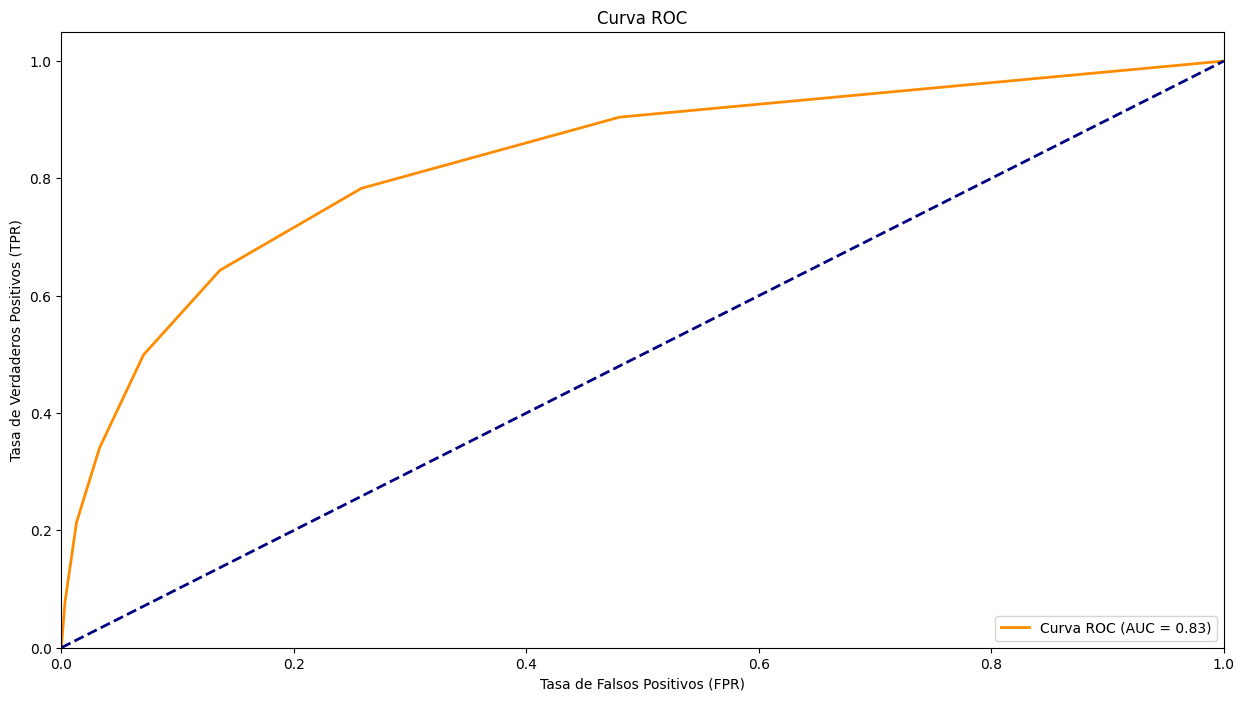

In [ ]:
# Gráfico la curva ROC
plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]
best_threshold

0.2857142857142857

In [ ]:
optimal_threshold = best_threshold

# Aplica el umbral óptimo para hacer predicciones
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

f1_score_logreg = f1_score(y_test, y_pred_optimal)

confusion_matrix_logreg = confusion_matrix(y_test, y_pred_optimal)

classification_report_logreg = classification_report(y_test, y_pred_optimal)

print(f'f1 Score: {f1_score_logreg} \n')
print(f'Confusion Matrix:\n{confusion_matrix_logreg} \n')
print(f'Classification Report:\n{classification_report_logreg} \n')

f1 Score: 0.5898643035170313 

Confusion Matrix:
[[3407 1186]
 [ 295 1065]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      4593
           1       0.47      0.78      0.59      1360

    accuracy                           0.75      5953
   macro avg       0.70      0.76      0.71      5953
weighted avg       0.82      0.75      0.77      5953
 



A pesar de un ligero aumento en el rendimiento de la regresión logística, no hay una gran diferencia entre ambos modelos. Esto sugiere que, aunque la regresión logística tuvo un desempeño levemente superior, KNN sigue siendo una alternativa válida con resultados similares en la predicción de lluvia.

Considero oportuno, en este caso, usar KNN o la regresión logística como un modelo base a superar.